Mounting Google Drive and Importing Libraries and Files Needed

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from tqdm import tqdm
from scipy.spatial.distance import cosine

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
ind_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vizualizing Data from CSV files, to know what is the most important data


In [5]:
kamus_alay = pd.read_csv('/content/drive/MyDrive/new_kamusalay.csv',encoding='latin-1', header=None)

abusive_dict = pd.read_csv('/content/drive/MyDrive/abusive.csv')['ABUSIVE'].tolist()

In [6]:
data = pd.read_csv('/content/drive/MyDrive/data.csv', encoding = 'CP437')

print(data.head(5))

                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0 

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB
None


In [8]:
print(kamus_alay)

                         0                                  1
0      anakjakartaasikasik           anak jakarta asyik asyik
1             pakcikdahtua                  pak cik sudah tua
2           pakcikmudalagi                  pak cik muda lagi
3              t3tapjokowi                       tetap jokowi
4                       3x                          tiga kali
...                    ...                                ...
15162            mendikbud  menteri pendidikan dan kebudayaan
15163               mendag                menteri perdagangan
15164              menaker               menteri tenaga kerja
15165             memetwit                            mentwit
15166             megangin                           memegang

[15167 rows x 2 columns]


In [9]:
print(kamus_alay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15167 non-null  object
 1   1       15167 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB
None


In [10]:
print(data.describe())

                 HS       Abusive  HS_Individual      HS_Group   HS_Religion  \
count  13169.000000  13169.000000   13169.000000  13169.000000  13169.000000   
mean       0.422280      0.382945       0.271471      0.150809      0.060217   
std        0.493941      0.486123       0.444735      0.357876      0.237898   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        1.000000      1.000000       1.000000      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

            HS_Race   HS_Physical     HS_Gender      HS_Other       HS_Weak  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean       0.042980      0.024527      0.023236      0.284000      0.256891   
std        0.202819      0.154685      0.1

<Axes: ylabel='Frequency'>

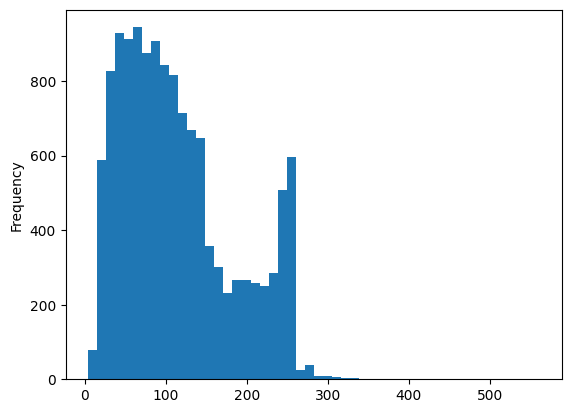

In [11]:
data['text_length'] = data['Tweet'].apply(len)
data['text_length'].plot.hist(bins=50)


Preprocessing the Tweets


In [13]:
def processText(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [kamus_alay.get(word.lower(), word) for word in tokens]
    tokens = [word for word in tokens if not word.lower() in ind_stopwords]
    return tokens

In [14]:
words = data['Tweet'].apply(processText).sum()
data['processed'] = data['Tweet'].apply(processText)
processed_texts = data['processed'].apply(lambda x: ' '.join(x))

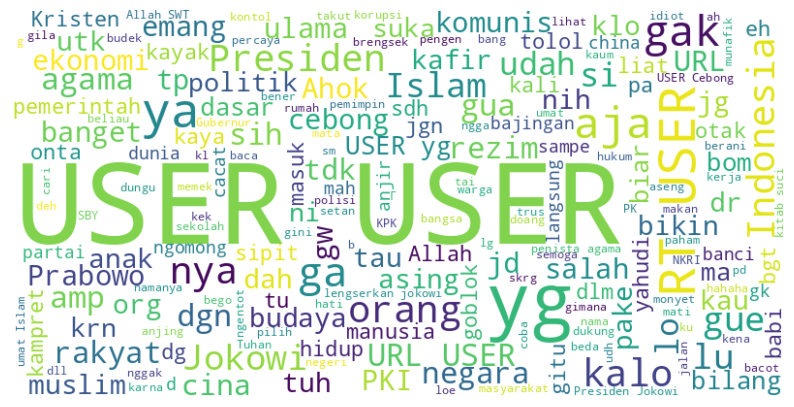

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(words))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
hs_columns = ['HS_Individual','HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
hs_count = data[hs_columns].sum()

print(hs_count)

HS_Individual    3575
HS_Group         1986
HS_Religion       793
HS_Race           566
HS_Physical       323
HS_Gender         306
HS_Other         3740
dtype: int64


In [17]:
hs_counts = data['HS'].sum()
print(hs_counts)

5561


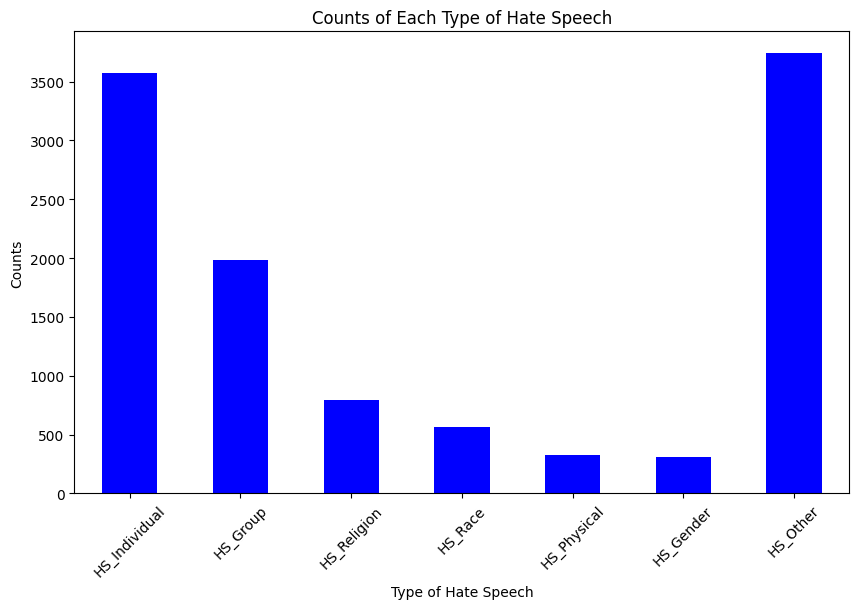

In [18]:
hs_count.plot(kind = 'bar', figsize = (10, 6), color = 'blue')

plt.title('Counts of Each Type of Hate Speech')
plt.xlabel('Type of Hate Speech')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [19]:
hs_category = ['HS_Weak', 'HS_Moderate', 'HS_Strong']
hs_category_count = data[hs_category].sum()

print(hs_category_count)

HS_Weak        3383
HS_Moderate    1705
HS_Strong       473
dtype: int64


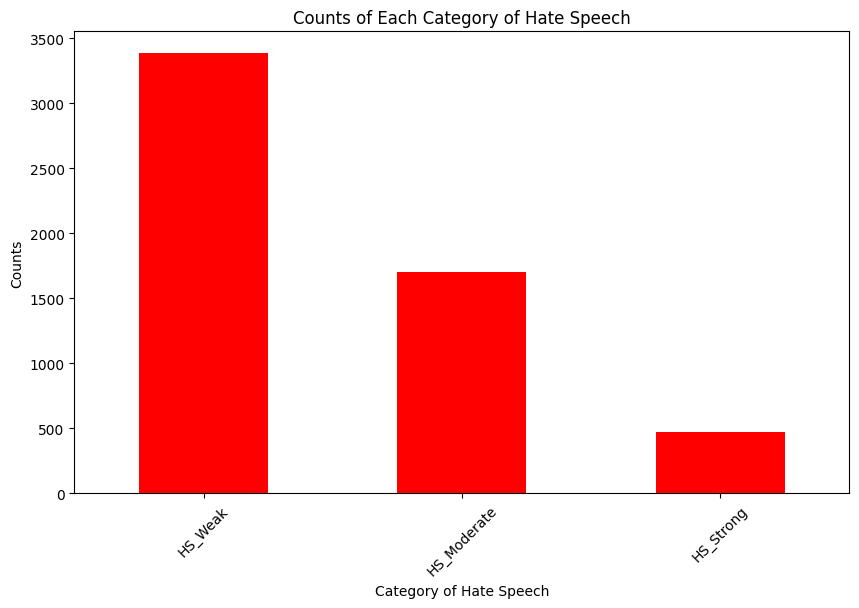

In [20]:
hs_category_count.plot(kind = 'bar', figsize = (10, 6), color = 'red')

plt.title('Counts of Each Category of Hate Speech')
plt.xlabel('Category of Hate Speech')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Separating the data from the dataset and creating a new file


In [21]:
df_HS = data[['Tweet', 'HS']]
df_Abusive = data[['Tweet', 'Abusive']]
df_Individual = data[['Tweet', 'HS_Individual']]
df_Group = data[['Tweet', 'HS_Group']]
df_Religion = data[['Tweet', 'HS_Religion']]
df_Race = data[['Tweet', 'HS_Race']]
df_Physical = data[['Tweet', 'HS_Physical']]
df_Gender = data[['Tweet', 'HS_Gender']]
df_Other = data[['Tweet', 'HS_Other']]
df_Weak = data[['Tweet', 'HS_Weak']]
df_Moderate = data[['Tweet', 'HS_Moderate']]
df_Strong = data[['Tweet', 'HS_Strong']]

In [22]:
df_HS_1 = df_HS[df_HS['HS'] == 1]
df_HS_0 = df_HS[df_HS['HS'] == 0].iloc[:5561]
df_HS_bal = pd.concat([df_HS_1, df_HS_0], axis=0)
df_HS_bal.shape

(11122, 2)

In [23]:
df_Abusive_1 = df_Abusive[df_Abusive['Abusive'] == 1]
df_Abusive_0 = df_Abusive[df_Abusive['Abusive'] == 0].iloc[:5043]
df_Abusive_bal = pd.concat([df_Abusive_1, df_Abusive_0], axis=0)
df_Abusive_bal.shape

(10086, 2)

In [24]:
df_Individual_1 = df_Individual[df_Individual['HS_Individual'] == 1]
df_Individual_0 = df_Individual[df_Individual['HS_Individual'] == 0].iloc[:3575]
df_Individual_bal = pd.concat([df_Individual_1, df_Individual_0], axis=0)
df_Individual_bal.shape

(7150, 2)

In [25]:
df_Group_1 = df_Group[df_Group['HS_Group'] == 1]
df_Group_0 = df_Group[df_Group['HS_Group'] == 0].iloc[:1986]
df_Group_bal = pd.concat([df_Group_1, df_Group_0], axis=0)
df_Group_bal.shape

(3972, 2)

In [26]:
df_Religion_1 = df_Religion[df_Religion['HS_Religion'] == 1]
df_Religion_0 = df_Religion[df_Religion['HS_Religion'] == 0].iloc[:793]
df_Religion_bal = pd.concat([df_Religion_1, df_Religion_0], axis=0)
df_Religion_bal.shape

(1586, 2)

In [27]:
df_Race_1 = df_Race[df_Race['HS_Race'] == 1]
df_Race_0 = df_Race[df_Race['HS_Race'] == 0].iloc[:566]
df_Race_bal = pd.concat([df_Race_1, df_Race_0], axis=0)
df_Race_bal.shape

(1132, 2)

In [28]:
df_Physical_1 = df_Physical[df_Physical['HS_Physical'] == 1]
df_Physical_0 = df_Physical[df_Physical['HS_Physical'] == 0].iloc[:323]
df_Physical_bal = pd.concat([df_Physical_1, df_Physical_0], axis=0)
df_Physical_bal.shape

(646, 2)

In [29]:
df_Gender_1 = df_Gender[df_Gender['HS_Gender'] == 1]
df_Gender_0 = df_Gender[df_Gender['HS_Gender'] == 0].iloc[:306]
df_Gender_bal = pd.concat([df_Gender_1, df_Gender_0], axis=0)
df_Gender_bal.shape

(612, 2)

In [30]:
df_Other_1 = df_Other[df_Other['HS_Other'] == 1]
df_Other_0 = df_Other[df_Other['HS_Other'] == 0].iloc[:3740]
df_Other_bal = pd.concat([df_Other_1, df_Other_0], axis=0)
df_Other_bal.shape

(7480, 2)

In [31]:
df_Weak_1 = df_Weak[df_Weak['HS_Weak'] == 1]
df_Weak_0 = df_Weak[df_Weak['HS_Weak'] == 0].iloc[:3383]
df_Weak_bal = pd.concat([df_Weak_1, df_Weak_0], axis=0)
df_Weak_bal.shape

(6766, 2)

In [32]:
df_Moderate_1 = df_Moderate[df_Moderate['HS_Moderate'] == 1]
df_Moderate_0 = df_Moderate[df_Moderate['HS_Moderate'] == 0].iloc[:1705]
df_Moderate_bal = pd.concat([df_Moderate_1, df_Moderate_0], axis=0)
df_Moderate_bal.shape

(3410, 2)

In [33]:
df_Strong_1 = df_Strong[df_Strong['HS_Strong'] == 1]
df_Strong_0 = df_Strong[df_Strong['HS_Strong'] == 0].iloc[:473]
df_Strong_bal = pd.concat([df_Strong_1, df_Strong_0], axis=0)
df_Strong_bal.shape

(946, 2)

Using TFIDF Vectorizer to find out the most common words and embbed the data so the model can be trained


In [34]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [35]:
tfidf_word_counts = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
tfidf_most_common_words = tfidf_word_counts.sum().sort_values(ascending=False).head(20)
print("Most common words (TF-IDF):")
print(tfidf_most_common_words)

Most common words (TF-IDF):
user         1181.017981
yg            299.357634
rt            171.580783
url           168.186399
jokowi        165.322126
ya            151.978548
presiden      138.056783
aja           130.177711
orang         129.254907
indonesia     122.109341
islam         119.629308
gak           119.144587
ga            118.344440
agama         110.391949
lu            110.222027
cebong        109.019073
nya            96.738781
cina           91.006067
kalo           89.440196
si             83.853994
dtype: float64


In [36]:
sentences = data['processed'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [37]:
example_word = 'anjing'
if example_word in word2vec_model.wv:
    word_vector = word2vec_model.wv[example_word]
    print(f"Vector for the word '{example_word}':")
    print(word_vector)


Vector for the word 'anjing':
[-0.22272259  0.58680487  0.15874533  0.11091653  0.14824434 -0.6482944
 -0.01180211  0.94502515 -0.25971904 -0.30546707 -0.32214007 -0.54811734
 -0.03113637 -0.01680891  0.10959849 -0.10882348  0.14471702 -0.5148667
  0.10346207 -0.9329762   0.3833085   0.00662577  0.28054944 -0.2186407
 -0.23183103 -0.0295112  -0.38021353 -0.61217153  0.17030409  0.26038858
  0.5316051  -0.0721589  -0.09810072 -0.1469935  -0.16869213  0.76303464
  0.1072022  -0.13799462 -0.2571265  -0.88097835  0.4829153  -0.86819935
  0.16179246  0.15163969  0.35280934 -0.15400249 -0.19269711 -0.5020323
  0.09907221  0.14403552  0.24156465 -0.5915349  -0.03022002 -0.15632956
 -0.41564095  0.4425642   0.32625267  0.20428528 -0.14751571  0.07204721
 -0.12906133  0.24906611  0.14537415  0.15629545 -0.24508189  0.6109339
  0.13189445  0.15138374 -0.69047576  0.660044   -0.7838266  -0.07175951
  0.6940644   0.02288497  0.2139641   0.04445763 -0.06014058  0.03500298
 -0.43394327  0.392754   -

In [38]:
df_HS_bal.to_csv("/content/HS.csv")
df_Abusive_bal.to_csv("/content/Abusive.csv")
df_Individual_bal.to_csv("/content/Individual.csv")
df_Group_bal.to_csv("/content/Group.csv")
df_Religion_bal.to_csv("/content/Religion.csv")
df_Race_bal.to_csv("/content/Race.csv")
df_Physical_bal.to_csv("/content/Physical.csv")
df_Gender_bal.to_csv("/content/Gender.csv")
df_Other_bal.to_csv("/content/Other.csv")
df_Weak_bal.to_csv("/content/Weak.csv")
df_Moderate_bal.to_csv("/content/Moderate.csv")
df_Strong_bal.to_csv("/content/Strong.csv")

In [39]:
x = df_HS.Tweet.fillna(' ')
y = df_HS['HS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfvHS = TfidfVectorizer(ngram_range=(1,1), stop_words=ind_stopwords)
x_train_scal = tfvHS.fit_transform(x_train)
x_test_scal = tfvHS.transform(x_test)
nbHS = ComplementNB()
nbHS.fit(x_train_scal, y_train)
nb_y_pred = nbHS.predict(x_test_scal)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Evaluation Metrics with Confusion Matrix and Classification Report

In [42]:
example_tweet = input('Tweet Example: ')
example1_preprocessed = [text for text in processText(example_tweet)]
print("Preprocessed Text:", example1_preprocessed)
example1_transform = tfvHS.transform(example1_preprocessed)
zero=nbHS.predict_proba(example1_transform)[:,0][0]
one=nbHS.predict_proba(example1_transform)[:,1][0]
if one > 0.15:
    print('HS')
else:
    print('Not HS')

Tweet Example: kontol
Preprocessed Text: ['kontol']
HS


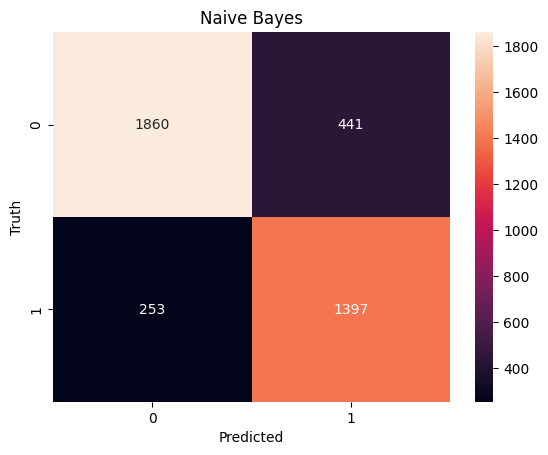

In [43]:
nb_cm = confusion_matrix(y_test, nb_y_pred)

sns.heatmap(nb_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Naive Bayes')
plt.show()

In [62]:


example_tweet = input('Tweet Example: ')
example1_preprocessed = [text for text in processText(example_tweet)]
print("Preprocessed Text:", example1_preprocessed)
example1_transform = tfvHS.transform(example1_preprocessed)
zero=svmHS.predict_proba(example1_transform)[:,0][0]
one=svmHS.predict_proba(example1_transform)[:,1][0]
if one>0.15:
    print('HS')
else:
    print('Not HS')

Tweet Example: anjing
Preprocessed Text: ['anjing']
HS


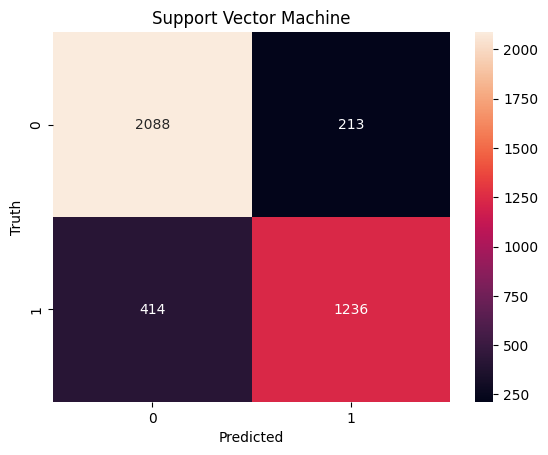

In [60]:
svmHS = SVC(probability=True)
svmHS.fit(x_train_scal, y_train)
svm_y_pred = svmHS.predict(x_test_scal)

svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Support Vector Machine')
plt.show()

In [46]:
def modelling(data, category, vectorizer, ngram):
    X = data['Tweet'].fillna(' ')
    Y = data[category]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    vector = vectorizer(ngram_range=(ngram), stop_words=ind_stopwords)

    X_train_scal = vector.fit_transform(X_train)
    X_test_scal = vector.transform(X_test)

    cnb = ComplementNB()
    cnb.fit(X_train_scal, Y_train)
    Y_pred_cnb = cnb.predict(X_test_scal)
    print(f"naive bayes classification report for {category} \n {classification_report(Y_test, Y_pred_cnb)} ")

    svm = SVC(kernel='rbf')
    svm.fit(X_train_scal, Y_train)
    Y_pred_svm = svm.predict(X_test_scal)
    print(f"\nsvm classification report for {category} \n {classification_report(Y_test, Y_pred_svm)} ")

In [48]:
data_HS = pd.read_csv('/content/HS.csv')
result_HS = modelling(data_HS, 'HS', TfidfVectorizer, (1,1))
print(result_HS)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for HS 
               precision    recall  f1-score   support

           0       0.89      0.70      0.78      1664
           1       0.75      0.92      0.83      1673

    accuracy                           0.81      3337
   macro avg       0.82      0.81      0.81      3337
weighted avg       0.82      0.81      0.81      3337
 

svm classification report for HS 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1664
           1       0.84      0.82      0.83      1673

    accuracy                           0.83      3337
   macro avg       0.83      0.83      0.83      3337
weighted avg       0.83      0.83      0.83      3337
 
None


In [49]:
data_abusive = pd.read_csv('/content/Abusive.csv')
result_abusive = modelling(data_abusive, 'Abusive', TfidfVectorizer, (1,1))
print(result_abusive)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for Abusive 
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      1477
           1       0.82      0.92      0.87      1549

    accuracy                           0.86      3026
   macro avg       0.86      0.86      0.86      3026
weighted avg       0.86      0.86      0.86      3026
 

svm classification report for Abusive 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1477
           1       0.91      0.89      0.90      1549

    accuracy                           0.90      3026
   macro avg       0.90      0.90      0.90      3026
weighted avg       0.90      0.90      0.90      3026
 
None


In [50]:
data_Individual = pd.read_csv('/content/Individual.csv')
result_Individual = modelling(data_Individual, 'HS_Individual', TfidfVectorizer, (1,1))
print(result_Individual)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for HS_Individual 
               precision    recall  f1-score   support

           0       0.86      0.67      0.75      1042
           1       0.74      0.89      0.81      1103

    accuracy                           0.79      2145
   macro avg       0.80      0.78      0.78      2145
weighted avg       0.80      0.79      0.78      2145
 

svm classification report for HS_Individual 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1042
           1       0.81      0.80      0.80      1103

    accuracy                           0.80      2145
   macro avg       0.80      0.80      0.80      2145
weighted avg       0.80      0.80      0.80      2145
 
None


In [51]:
data_Group = pd.read_csv('/content/Group.csv')
result_Group = modelling(data_Group, 'HS_Group', TfidfVectorizer, (1,1))
result_Group

naive bayes classification report for HS_Group 
               precision    recall  f1-score   support

           0       0.83      0.67      0.74       578
           1       0.74      0.87      0.80       614

    accuracy                           0.78      1192
   macro avg       0.79      0.77      0.77      1192
weighted avg       0.78      0.78      0.77      1192
 


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(



svm classification report for HS_Group 
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       578
           1       0.81      0.73      0.77       614

    accuracy                           0.77      1192
   macro avg       0.78      0.78      0.77      1192
weighted avg       0.78      0.77      0.77      1192
 


In [52]:
data_Religion = pd.read_csv('/content/Religion.csv')
result_Religion = modelling(data_Religion, 'HS_Religion', TfidfVectorizer, (1,1))
print(result_Religion)

naive bayes classification report for HS_Religion 
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       240
           1       0.77      0.92      0.84       236

    accuracy                           0.82       476
   macro avg       0.83      0.82      0.82       476
weighted avg       0.83      0.82      0.82       476
 


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(



svm classification report for HS_Religion 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       240
           1       0.91      0.83      0.87       236

    accuracy                           0.88       476
   macro avg       0.88      0.88      0.88       476
weighted avg       0.88      0.88      0.88       476
 
None


In [53]:
data_Race = pd.read_csv('/content/Race.csv')
result_Race = modelling(data_Race, 'HS_Race', TfidfVectorizer, (1,1))
result_Race

naive bayes classification report for HS_Race 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       158
           1       0.81      0.93      0.87       182

    accuracy                           0.85       340
   macro avg       0.86      0.84      0.85       340
weighted avg       0.86      0.85      0.85       340
 

svm classification report for HS_Race 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       158
           1       0.94      0.87      0.90       182

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340
 


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [54]:
data_Physical = pd.read_csv('/content/Physical.csv')
result_Physical = modelling(data_Physical, 'HS_Physical', TfidfVectorizer, (1,1))
result_Physical

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for HS_Physical 
               precision    recall  f1-score   support

           0       0.85      0.60      0.71        88
           1       0.73      0.92      0.82       106

    accuracy                           0.77       194
   macro avg       0.79      0.76      0.76       194
weighted avg       0.79      0.77      0.77       194
 

svm classification report for HS_Physical 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81        88
           1       0.89      0.75      0.81       106

    accuracy                           0.81       194
   macro avg       0.82      0.82      0.81       194
weighted avg       0.82      0.81      0.81       194
 


In [55]:
data_Others = pd.read_csv('/content/Other.csv')
result_Others = modelling(data_Others, 'HS_Other', TfidfVectorizer, (1,1))
result_Others

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for HS_Other 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1118
           1       0.76      0.94      0.84      1126

    accuracy                           0.82      2244
   macro avg       0.84      0.82      0.81      2244
weighted avg       0.83      0.82      0.81      2244
 

svm classification report for HS_Other 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1118
           1       0.83      0.85      0.84      1126

    accuracy                           0.83      2244
   macro avg       0.83      0.83      0.83      2244
weighted avg       0.83      0.83      0.83      2244
 


In [56]:
data_Weak = pd.read_csv('/content/Weak.csv')
result_Weak = modelling(data_Weak, 'HS_Weak', TfidfVectorizer, (1,1))
print(result_Weak)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for HS_Weak 
               precision    recall  f1-score   support

           0       0.83      0.63      0.72       995
           1       0.71      0.87      0.78      1035

    accuracy                           0.76      2030
   macro avg       0.77      0.75      0.75      2030
weighted avg       0.77      0.76      0.75      2030
 

svm classification report for HS_Weak 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       995
           1       0.80      0.80      0.80      1035

    accuracy                           0.80      2030
   macro avg       0.79      0.80      0.80      2030
weighted avg       0.80      0.80      0.80      2030
 
None


In [57]:
data_Moderate = pd.read_csv('/content/Moderate.csv')
result_Moderate = modelling(data_Moderate, 'HS_Moderate', TfidfVectorizer, (1,1))
print(result_Moderate)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


naive bayes classification report for HS_Moderate 
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       502
           1       0.71      0.86      0.78       521

    accuracy                           0.75      1023
   macro avg       0.76      0.74      0.74      1023
weighted avg       0.76      0.75      0.74      1023
 

svm classification report for HS_Moderate 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       502
           1       0.77      0.69      0.73       521

    accuracy                           0.74      1023
   macro avg       0.74      0.74      0.74      1023
weighted avg       0.74      0.74      0.74      1023
 
None


In [58]:
data_Strong = pd.read_csv('/content/Strong.csv')
result_Strong = modelling(data_Strong, 'HS_Strong', TfidfVectorizer, (1,1))
print(result_Strong)

naive bayes classification report for HS_Strong 
               precision    recall  f1-score   support

           0       0.93      0.76      0.84       144
           1       0.79      0.94      0.86       140

    accuracy                           0.85       284
   macro avg       0.86      0.85      0.85       284
weighted avg       0.86      0.85      0.85       284
 

svm classification report for HS_Strong 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       144
           1       0.95      0.85      0.90       140

    accuracy                           0.90       284
   macro avg       0.91      0.90      0.90       284
weighted avg       0.91      0.90      0.90       284
 
None


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
